In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np


print('Библиотетки успешно загружены')

Библиотетки успешно загружены


Описание данных
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [2]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-andrej-antoshkin-rsc7785/Statistika/Proverka_gipotez/conversion.csv", sep=',')

In [3]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? Используйте идентификатор кампании в базе Х – xyz_campaign_id.

In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
df.shape

(1143, 11)

In [7]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

In [8]:
df['xyz_campaign_id'].nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Логарифмируем мы для того, чтобы увидеть некоторые закономерности, неочевидные на изначальных данных (попробуйте сравнить графики до и после логарифмирования).

In [9]:
df_agg = df.groupby('fb_campaign_id').agg({'Impressions':'sum'})

In [10]:
df_agg

,Impressions
fb_campaign_id,
103916,7350
103917,17861
103920,693
103928,8392
103929,1915
...,...
179977,1129773
179978,637549
179979,151531


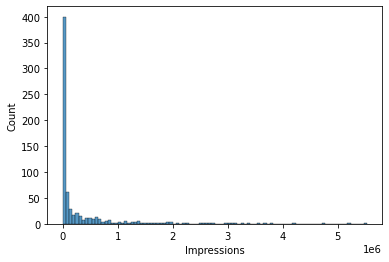

In [11]:
sns.histplot(data=df_agg, x='Impressions')

In [12]:
#Здесь нам понадобится функция np.log():
df_agg["log_imp"] = np.log(df_agg.Impressions)

In [13]:
df_agg

,Impressions,log_imp
fb_campaign_id,,
103916,7350,8.902456
103917,17861,9.790375
103920,693,6.541030
103928,8392,9.035034
103929,1915,7.557473
...,...,...
179977,1129773,13.937527
179978,637549,13.365386
179979,151531,11.928546


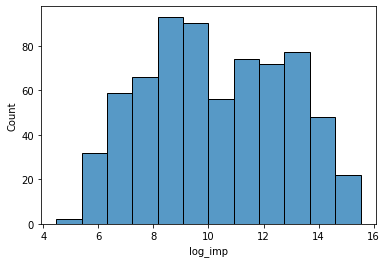

In [14]:
sns.histplot(data=df_agg, x='log_imp')

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= 
impressions
clicks
​
 

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [15]:
df_with_ctr = df.copy()

In [16]:
df_with_ctr

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [17]:
df_with_ctr['CTR'] = df_with_ctr['Clicks'] / df_with_ctr['Impressions']

In [18]:
df_with_ctr[['ad_id', 'CTR']].sort_values('CTR',ascending=False)

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
274,777201,0.000000
281,777482,0.000000
286,777638,0.000000
288,777673,0.000000


In [19]:
df_with_ctr.sort_values(by='CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
274,777201,936,115631,30-34,M,64,1882,0,0.00,1,1,0.000000
281,777482,936,115691,45-49,M,28,2479,0,0.00,1,0,0.000000
286,777638,936,115717,40-44,M,7,1781,0,0.00,1,1,0.000000
288,777673,936,115723,40-44,M,16,7101,0,0.00,1,0,0.000000


Визуализируйте CTR для каждой из рекламных кампаний (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916? Для полного визуального совпадения вам понадобится функция sns.distplot(), параметр bins=20 - но можете попробовать и другие варианты функций для гистограмм.

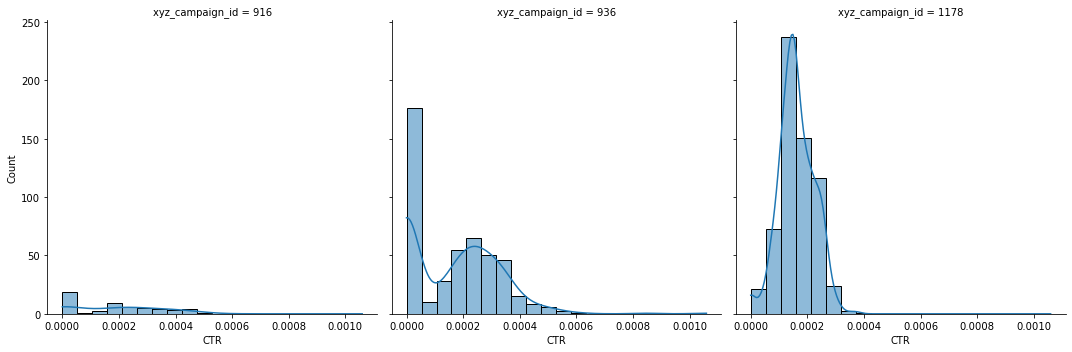

In [20]:
# Данные
#fig, axes = plt.subplots(1, figsize=(16, 16))


#sns.histplot(data=df_with_ctr, x='СTR', hue='xyz_campaign_id', 

sns.displot(data = df_with_ctr, x="CTR", col="xyz_campaign_id", kde = True, bins = 20)

# Одна строка кода - 3 графика!
# sns.displot(
#     data=df_with_ctr, 
#     x="CTR", 
#     col="xyz_campaign_id",  # замените на ваше название
#     bins=20,
#     kde=True,
#     height=4,
#     aspect=1
# )
plt.show()
#sns.distplot()

Уникальные кампании: [ 916  936 1178]


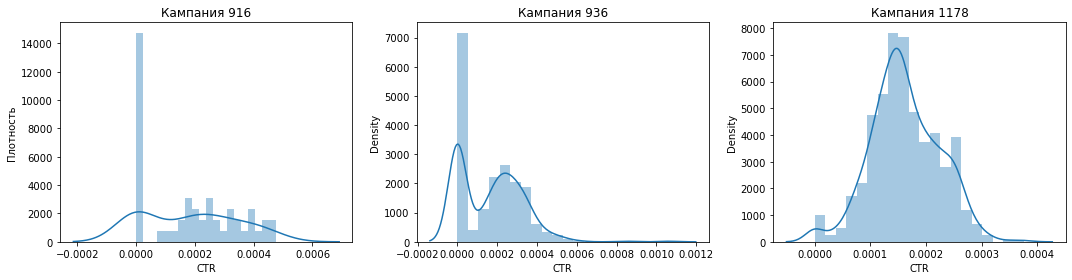

In [21]:
import warnings
warnings.filterwarnings('ignore')  # Игнорируем предупреждение об устаревании

# Получаем список уникальных кампаний
campaigns = df_with_ctr['xyz_campaign_id'].unique()
print(f"Уникальные кампании: {campaigns}")

# Создаем 3 графика в ряд
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Строим распределение для каждой кампании
for i, campaign in enumerate(campaigns):
    # Фильтруем данные для конкретной кампании
    campaign_data = df_with_ctr[df_with_ctr['xyz_campaign_id'] == campaign]
    
    # Используем distplot с bins=20 (как в задании)
    sns.distplot(campaign_data['CTR'], bins=20, ax=axes[i], kde=True)
    
    # Настройки графика
    axes[i].set_title(f'Кампания {campaign}')
    axes[i].set_xlabel('CTR')
    if i == 0:
        axes[i].set_ylabel('Плотность')

plt.tight_layout()
plt.show()

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= 
clicks
spent
​
 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [22]:
df_with_ctr['CPC'] = df_with_ctr['Spent'] / df_with_ctr['Clicks']

In [23]:
df_with_ctr['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [24]:
round(st.iqr(df_with_ctr.CPC, nan_policy='omit'),2)

0.25

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

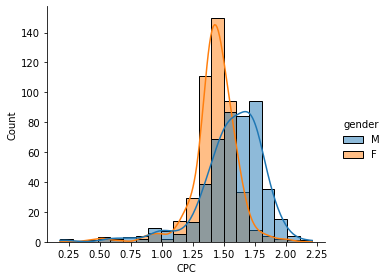

In [25]:
sns.displot(
    data=df_with_ctr, 
    x="CPC", 
    hue="gender",           # цветовая разбивка по полу
    kde=True, 
    bins=20,
    height=4,              # высота каждого графика
    aspect=1.2             # соотношение сторон
)


Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20%. Знак процента в ответе указывать не нужно.

Note: клики – Clicks, покупки – Approved_Conversion.

In [44]:
df_with_ctr['CR'] = (df_with_ctr['Approved_Conversion'] / df_with_ctr['Clicks']) * 100

In [45]:
df_with_ctr

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481


In [47]:
round(df_with_ctr[df_with_ctr['ad_id'] == 1121814]['CR'],2)

860    3.09
Name: CR, dtype: float64